In [13]:
#! pip install -U giotto-tda --quiet

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


#from google.colab import drive

#drive.mount('/content/drive')

#path = 'drive/MyDrive/MUIA/TFM/'
path=''

In [15]:
#reads the csv
stocks = pd.read_excel(f'{path}data/stocks_spain_2000.xlsx')
stocks.drop(columns=stocks.columns[0], axis=1, inplace=True)

stocks


,Date,A3M,ELE,BKT,ECR,REP,RED,CAF,EBRO,ALB,...,BBVA,SAB,CIE,ACX,COL,ANA,TL5,MAP,IBE,IDR
0,1104710400000000000,13.6250,17.080000,4.914858,5.800,19.200001,4.1250,6.175000,10.404929,26.000000,...,12.614568,2.563590,2.060349,11.940,223.617294,65.550003,13.907362,2.181585,4.6225,12.71
1,1104796800000000000,14.3125,17.000000,4.893535,5.900,19.160000,4.1675,6.175000,10.484125,26.500000,...,12.547316,2.578408,2.042510,11.910,223.617294,66.599998,14.567894,2.193495,4.6500,12.73
2,1104883200000000000,14.1250,16.770000,4.889773,5.900,18.850000,4.1250,6.325000,10.682125,26.150000,...,12.480064,2.563590,2.042510,11.640,221.614197,65.750000,14.341684,2.161734,4.6000,12.60
3,1104969600000000000,14.1250,16.770000,4.889773,5.900,18.850000,4.1250,6.325000,10.682125,26.150000,...,12.480064,2.563590,2.042510,11.640,221.614197,65.750000,14.341684,2.124018,4.6000,12.60
4,1105056000000000000,14.8125,16.740000,4.889773,5.900,18.879999,4.1050,6.320000,10.711829,25.850000,...,12.604961,2.533953,2.051430,11.420,220.703705,65.750000,14.857442,2.149824,4.6275,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,1678752000000000000,3.4660,18.885000,6.098000,4.235,14.390000,15.7450,26.350000,16.600000,44.849998,...,6.690000,1.139000,26.120001,9.696,6.130000,177.000000,3.098000,1.913000,10.8600,11.57
4657,1678838400000000000,3.3800,18.490000,5.704000,3.980,13.390000,15.4200,25.450001,16.260000,44.450001,...,6.048000,1.019500,25.260000,9.024,5.945000,173.300003,3.052000,1.822000,10.8750,11.34
4658,1678924800000000000,3.3800,18.795000,5.560000,4.055,13.305000,15.6050,24.799999,16.400000,44.799999,...,6.254000,1.014500,25.580000,9.034,5.855000,176.199997,3.062000,1.832000,11.0500,11.37
4659,1679011200000000000,3.3460,18.525000,5.420000,3.985,13.485000,15.4250,24.750000,16.459999,45.299999,...,6.036000,0.982600,24.740000,8.982,5.810000,177.000000,3.022000,1.801000,10.9200,11.22


In [16]:
# Calcular retornos 
logreturn = np.log(stocks.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,ELE,BKT,ECR,REP,RED,CAF,EBRO,ALB,VID,...,BBVA,SAB,CIE,ACX,COL,ANA,TL5,MAP,IBE,IDR
1,0.049227,-0.004695,-0.004348,0.017094,-0.002086,0.010250,0.000000,0.007583,0.019048,-0.005295,...,-0.005346,0.005764,-0.008696,-0.002516,0.000000,0.015891,0.046402,0.005444,0.005932,0.001572
2,-0.013187,-0.013622,-0.000769,0.000000,-0.016312,-0.010250,0.024001,0.018710,-0.013296,0.011874,...,-0.005374,-0.005764,0.000000,-0.022931,-0.008998,-0.012845,-0.015650,-0.014585,-0.010811,-0.010265
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017601,0.000000,0.000000
4,0.047525,-0.001791,0.000000,0.000000,0.001590,-0.004860,-0.000791,0.002777,-0.011539,0.000000,...,0.009958,-0.011628,0.004358,-0.019081,-0.004117,0.000000,0.035331,0.012076,0.005960,-0.007968
5,0.011745,0.005956,-0.010570,-0.017094,0.001059,-0.005496,0.020361,0.008283,0.005786,-0.002627,...,-0.005350,0.000000,0.000000,0.005240,0.009035,0.009837,0.023474,0.007360,-0.004874,-0.008032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,0.005207,0.014938,0.027937,0.023896,0.010479,0.000953,0.007619,0.021925,0.019134,0.035091,...,0.033592,0.043973,0.022455,0.011410,0.024774,0.016520,0.001292,0.004191,0.016713,0.034289
4657,-0.025125,-0.021138,-0.066793,-0.062102,-0.072025,-0.020857,-0.034753,-0.020695,-0.008959,-0.017923,...,-0.100886,-0.110838,-0.033479,-0.071826,-0.030644,-0.021126,-0.014960,-0.048738,0.001380,-0.020079
4658,0.000000,0.016361,-0.025570,0.018669,-0.006368,0.011926,-0.025872,0.008573,0.007843,0.011634,...,0.033494,-0.004916,0.012589,0.001108,-0.015255,0.016595,0.003271,0.005473,0.015964,0.002642
4659,-0.010110,-0.014470,-0.025502,-0.017413,0.013438,-0.011602,-0.002018,0.003652,0.011099,-0.009509,...,-0.035480,-0.031949,-0.033389,-0.005773,-0.007715,0.004530,-0.013149,-0.017066,-0.011834,-0.013280


In [17]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceLandscape
from sklearn.preprocessing import StandardScaler

# Constructing persistence landscapes
window_size = 100
#n_points = 1000
#t_range = np.linspace(0, 5, n_points)
landscapes_list = []
norms = []

show=True

for i in range(len(logreturn) - window_size + 1): #Sliding window from 0 to 1xxx
    X = StandardScaler().fit_transform(logreturn.iloc[i : i + window_size, :].values)
    
    VR = VietorisRipsPersistence(metric="euclidean", homology_dimensions=[1], n_jobs=-1) #Probar dimensiones (0,1)
    diagrams = VR.fit_transform([X])

    landscapes = PersistenceLandscape(n_jobs=-1).fit_transform(diagrams)
    landscapes_list.append(landscapes)

    norm_1 = np.linalg.norm(landscapes[0, 0, :], ord=1)
    norm_2 = np.linalg.norm(landscapes[0, 0, :], ord=2)
    norms.append([norm_1, norm_2])

    if show == True:
      print(np.shape(X))
      print('diagrams:')
      print(diagrams)
      print('landscapes:')
      print(landscapes)
      print('norm1:')
      print(norm_1)
      print('---')
      show = False

norms = np.array(norms)



(100, 35)
diagrams:
[[[7.23193121 7.50218105 1.        ]
  [6.57301903 6.63777733 1.        ]
  [5.55458355 5.59652805 1.        ]
  [5.42085028 5.46173239 1.        ]
  [5.00903368 5.11194944 1.        ]
  [4.63892603 4.64529848 1.        ]
  [4.56954193 4.59089184 1.        ]]]
landscapes:
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.00484751 0.03447013 0.03882302
   0.0092004  0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.00774756
   0.00351193 0.         0.         0.         0.01981713 0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.    

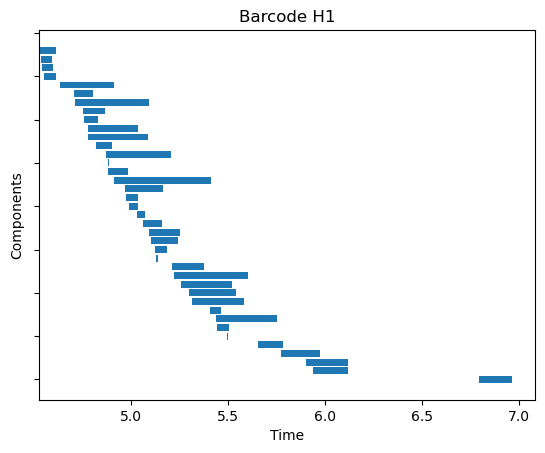

In [18]:
# Plotting persistence barcode
#print(np.shape(diagrams))
#print(diagrams[0][:, :3]) 

name = f'H{int(diagrams[0][0][2])}'
finish_values = diagrams[0][:,1]
#print(finish_values)
start_values = diagrams[0][:,0]
#print(start_values)

# Calculate the bar lengths
bar_lengths = [f - s for s, f in zip(start_values, finish_values)]

# Create a horizontal bar plot
fig, ax = plt.subplots()
ax.barh(range(len(start_values)), bar_lengths, left=start_values)

# Set the y-axis ticks and labels
ax.set_yticklabels([])
ax.set_ylabel('Components')

# Set the x-axis label
ax.set_xlabel('Time')

plt.title(f'Barcode {name}')
plt.show()

In [19]:
import gtda
print(gtda.__version__)

0.6.0


In [20]:
from gtda.plotting import plot_diagram

# Plotting persistence diagram

print(np.shape(diagrams))
print(diagrams[0][:, :3]) # plot diagram recieve: (birth, death, and persistence values).
plot_diagram(diagrams[0][:, :3])  # extract the first diagram and plot it



(1, 39, 3)
[[6.79260874 6.96096706 1.        ]
 [5.93648815 6.11689949 1.        ]
 [5.89809036 6.11689949 1.        ]
 [5.77328634 5.97060156 1.        ]
 [5.65120506 5.78391743 1.        ]
 [5.49135876 5.4969511  1.        ]
 [5.44162369 5.50296974 1.        ]
 [5.43695021 5.75348616 1.        ]
 [5.40535641 5.46292973 1.        ]
 [5.31119537 5.57848358 1.        ]
 [5.29683352 5.54014826 1.        ]
 [5.25601196 5.52143526 1.        ]
 [5.22137403 5.6019969  1.        ]
 [5.20961332 5.37696934 1.        ]
 [5.12617922 5.13829756 1.        ]
 [5.12366295 5.18131256 1.        ]
 [5.10184717 5.24150229 1.        ]
 [5.09155369 5.25150681 1.        ]
 [5.05896664 5.1566515  1.        ]
 [5.02929115 5.06830072 1.        ]
 [4.98932981 5.03468609 1.        ]
 [4.96987915 5.03468609 1.        ]
 [4.96879864 5.16110897 1.        ]
 [4.90833139 5.41262245 1.        ]
 [4.87966919 4.98241711 1.        ]
 [4.87816572 4.88305473 1.        ]
 [4.86863232 5.20567703 1.        ]
 [4.81967306 4.89

In [21]:
print(len(landscapes_list))
example_landscape = landscapes_list[len(landscapes_list)-1]

print(example_landscape)
# Plot the first landscape
# PersistenceLandscape.plot(diagrams, Xt=example_landscape)


4561
[[[0.         0.02460443 0.03563478 0.01103036 0.         0.01807647
   0.0426809  0.06728533 0.09188975 0.11649418 0.13965167 0.11504724
   0.10973676 0.13434119 0.15894561 0.18355004 0.17169401 0.14708959
   0.12248516 0.12398063 0.14858505 0.16385523 0.15809483 0.18269926
   0.20730368 0.23190811 0.24777852 0.2231741  0.19856967 0.17396524
   0.14936082 0.12475639 0.10015196 0.11570088 0.14030531 0.16490973
   0.18951416 0.16650428 0.14189985 0.11729542 0.092691   0.09696012
   0.12156455 0.14616897 0.14576255 0.12115812 0.0965537  0.07194927
   0.05493625 0.05317169 0.02856726 0.00666825 0.03127268 0.0558771
   0.08048153 0.09222926 0.06762483 0.04302041 0.05409522 0.07869964
   0.10330407 0.09090063 0.06629621 0.04169178 0.01708735 0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
 

4561
[[[0.         0.02460443 0.03563478 0.01103036 0.         0.01807647
   0.0426809  0.06728533 0.09188975 0.11649418 0.13965167 0.11504724
   0.10973676 0.13434119 0.15894561 0.18355004 0.17169401 0.14708959
   0.12248516 0.12398063 0.14858505 0.16385523 0.15809483 0.18269926
   0.20730368 0.23190811 0.24777852 0.2231741  0.19856967 0.17396524
   0.14936082 0.12475639 0.10015196 0.11570088 0.14030531 0.16490973
   0.18951416 0.16650428 0.14189985 0.11729542 0.092691   0.09696012
   0.12156455 0.14616897 0.14576255 0.12115812 0.0965537  0.07194927
   0.05493625 0.05317169 0.02856726 0.00666825 0.03127268 0.0558771
   0.08048153 0.09222926 0.06762483 0.04302041 0.05409522 0.07869964
   0.10330407 0.09090063 0.06629621 0.04169178 0.01708735 0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
 

<function matplotlib.pyplot.show(close=None, block=None)>

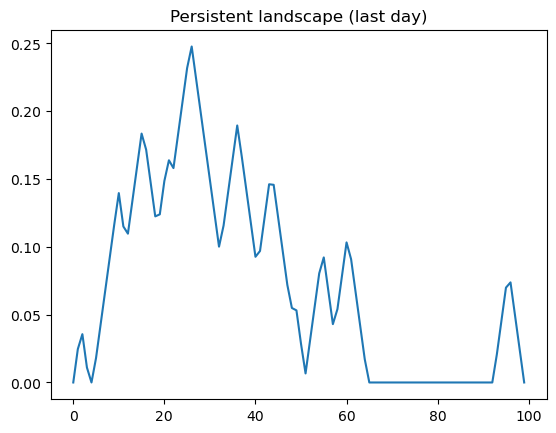

In [22]:
# Plotting landscapes 
#https://giotto-ai.github.io/gtda-docs/latest/modules/generated/diagrams/representations/gtda.diagrams.PersistenceLandscape.html

print(len(landscapes_list))
example_landscape = landscapes_list[len(landscapes_list)-1]
print(example_landscape)
print(np.shape(example_landscape))
print(example_landscape[0][0])

plt.plot(example_landscape[0][0])
plt.title('Persistent landscape (last day)')
plt.show

In [23]:
# Calculate mean of all columns for each row/day
mean_df = pd.DataFrame(logreturn.mean(axis=1), columns=['mean'])
print(np.shape(mean_df))
mean_df = mean_df.iloc[window_size:,:]
print(np.shape(mean_df))
print(mean_df)

# Calculate dates df to plot
dates = pd.to_datetime(stocks['Date'][window_size+1:]) #Este +1?
dates_lnorm = pd.to_datetime(stocks['Date'][window_size:])
print(len(dates))
print(dates)

(4660, 1)
(4560, 1)
          mean
101  -0.005537
102   0.001044
103   0.009689
104  -0.005667
105   0.008726
...        ...
4656  0.015408
4657 -0.036459
4658  0.007739
4659 -0.012908
4660  0.012125

[4560 rows x 1 columns]
4560
101    2005-05-24
102    2005-05-25
103    2005-05-26
104    2005-05-27
105    2005-05-30
          ...    
4656   2023-03-14
4657   2023-03-15
4658   2023-03-16
4659   2023-03-17
4660   2023-03-20
Name: Date, Length: 4560, dtype: datetime64[ns]


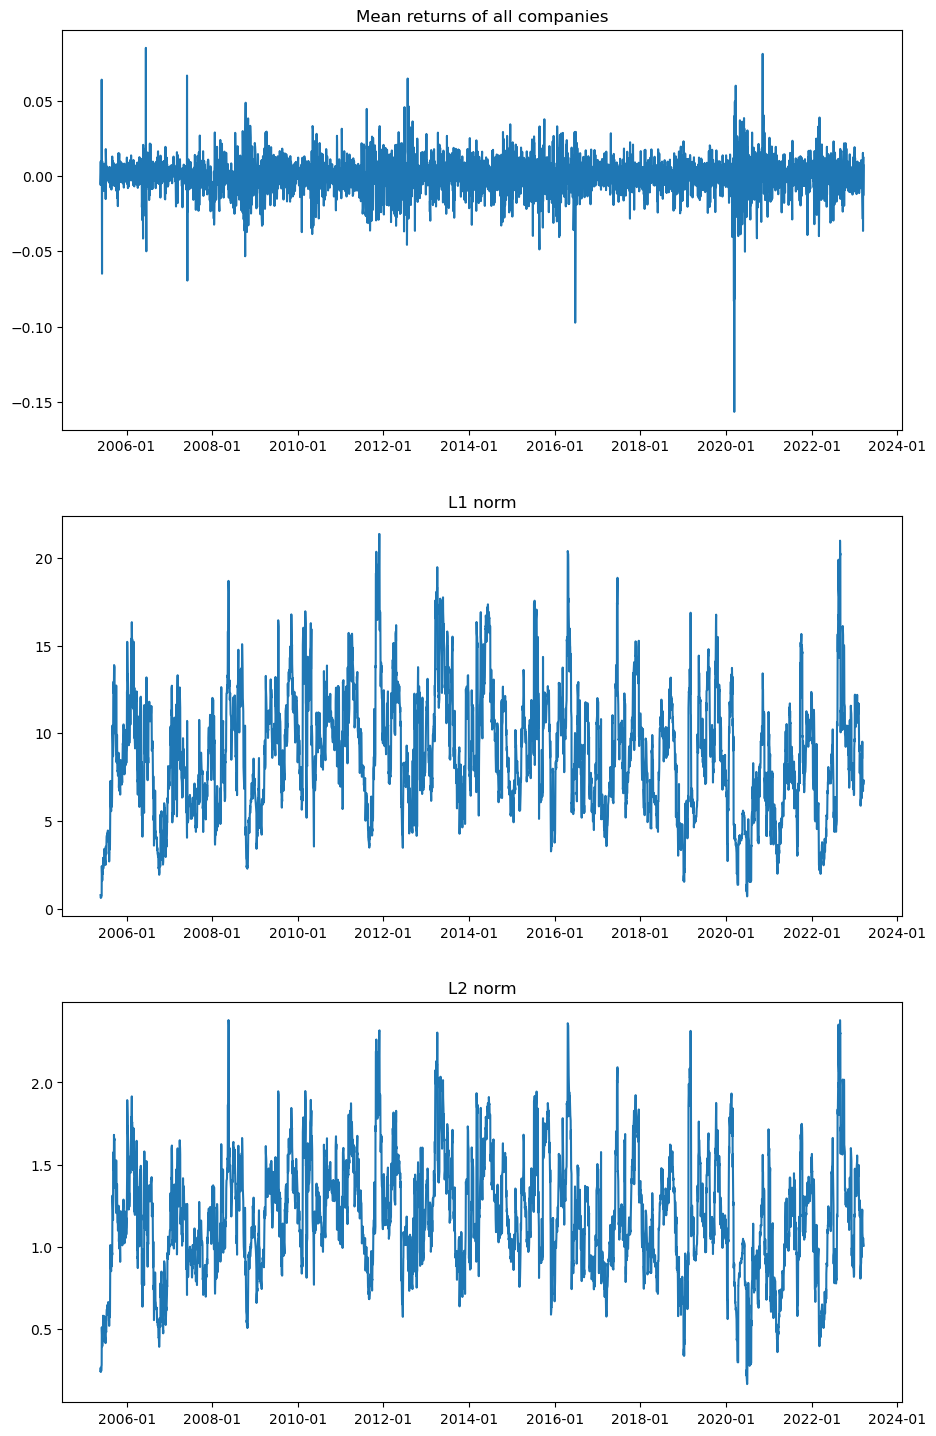

In [24]:
# Plotting returns and norms
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))


axes[0].plot(dates, mean_df["mean"])
axes[0].set_title("Mean returns of all companies")
axes[1].plot(dates_lnorm, norms[:, 0])
axes[1].set_title("L1 norm")
axes[2].plot(dates_lnorm, norms[:, 1])
axes[2].set_title("L2 norm")

for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout(pad=3)
plt.show()